### Depression Classification Modelling

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

hms = pd.read_csv("hms.csv")

#### Recode gender category to be binary

In [7]:
hms['gender_birth'] = hms['gender_birth'].apply(lambda x: 1 if x == 2 else 0)

#### Scale likert scale variables

Also flip some ordinal variables so "No/agree" is essentially 0 and "yes/agree" is 1 to be consistent

In [23]:
hms['financial_stress'] = hms['financial_stress'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))
hms['perceived_help_need'] = hms['perceived_help_need'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))
hms['know_where_help'] = hms['know_where_help'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))

In [25]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,stem,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white
0,18.0,1,5,3,5,3,3,1,1,3.5,...,0,0,1,0,0,0,12,13,4,0
1,22.0,2,4,2,5,1,0,0,0,2.5,...,0,0,1,0,0,0,12,10,6,0
2,19.0,2,1,3,4,4,4,0,0,4.0,...,0,0,0,0,0,0,13,12,6,0
3,18.0,2,3,1,1,5,0,0,0,3.0,...,1,0,0,0,0,0,7,7,9,0
4,20.0,1,1,3,4,4,3,1,1,2.5,...,0,0,0,0,0,0,16,8,3,0


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to normalize
ordinal_columns = ['seek_help_if_need', 'perceived_help_need', 'know_where_help', 'financial_stress', 'exercise_hours_weekly']

# Apply MinMaxScaler to these columns
scaler = MinMaxScaler()
hms[ordinal_columns] = scaler.fit_transform(hms[ordinal_columns])


In [29]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,stem,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white
0,18.0,1,1.00,1.000000,1.00,0.50,3,1,1,3.5,...,0,0,1,0,0,0,12,13,4,0
1,22.0,2,0.75,0.666667,1.00,0.00,0,0,0,2.5,...,0,0,1,0,0,0,12,10,6,0
2,19.0,2,0.00,1.000000,0.75,0.75,4,0,0,4.0,...,0,0,0,0,0,0,13,12,6,0
3,18.0,2,0.50,0.333333,0.00,1.00,0,0,0,3.0,...,1,0,0,0,0,0,7,7,9,0
4,20.0,1,0.00,1.000000,0.75,0.75,3,1,1,2.5,...,0,0,0,0,0,0,16,8,3,0


### Using PHQ-9 standardized guidelines to determine high and low risk of depression 
#### A score of 10 is considered needing intervention

Score Range  |  Severity  |  Clinical Interpretation

0–4        |     Minimal	|   Normal / No intervention usually needed

5–9	       |       Mild	  |   Watchful waiting; may not need treatment

10–14	    |     Moderate	 |  Possible clinical depression; monitor/assist

15–19       |    Moderately severe  |	Likely clinical depression; active treatment

20–27      |     Severe	    |   Severe depression; immediate treatment


In [35]:
hms['depression_risk'] = hms['depression_score'].apply(lambda x: 1 if x >= 10 else 0)


In [37]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white,depression_risk
0,18.0,1,1.00,1.000000,1.00,0.50,3,1,1,3.5,...,0,1,0,0,0,12,13,4,0,1
1,22.0,2,0.75,0.666667,1.00,0.00,0,0,0,2.5,...,0,1,0,0,0,12,10,6,0,1
2,19.0,2,0.00,1.000000,0.75,0.75,4,0,0,4.0,...,0,0,0,0,0,13,12,6,0,1
3,18.0,2,0.50,0.333333,0.00,1.00,0,0,0,3.0,...,0,0,0,0,0,7,7,9,0,0
4,20.0,1,0.00,1.000000,0.75,0.75,3,1,1,2.5,...,0,0,0,0,0,16,8,3,0,1


In [39]:
hms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 7838 non-null   float64
 1   gender_birth                7838 non-null   int64  
 2   exercise_hours_weekly       7838 non-null   float64
 3   seek_help_if_need           7838 non-null   float64
 4   perceived_help_need         7838 non-null   float64
 5   know_where_help             7838 non-null   float64
 6   num_of_support_areas        7838 non-null   int64  
 7   diagnosed_mental_illness    7838 non-null   int64  
 8   therapy_past12_months       7838 non-null   int64  
 9   gpa                         7838 non-null   float64
 10  financial_stress            7838 non-null   float64
 11  year_in_school              7838 non-null   int64  
 12  suicide_idea                7838 non-null   int64  
 13  suicide_plan                7838 

In [43]:
hms['depression_risk'].value_counts()

depression_risk
0    4649
1    3189
Name: count, dtype: int64

### Start machine learning process 
#### Keeping in mind the slight imbalance in the target variable

In [366]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Features and target
X = hms.drop(columns=['depression_risk','depression_score','mental_wellness_score','perceived_help_need', 'anxiety_score', 'suicide_idea','suicide_plan','suicide_attempt'])
y = hms['depression_risk']

# Split BEFORE oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply Random Oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

depression_risk
1    3719
0    3719
Name: count, dtype: int64

In [367]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [369]:
X.columns

Index(['student_age', 'gender_birth', 'exercise_hours_weekly',
       'seek_help_if_need', 'know_where_help', 'num_of_support_areas',
       'diagnosed_mental_illness', 'therapy_past12_months', 'gpa',
       'financial_stress', 'year_in_school', 'lonely_score',
       'eating_disorder_score', 'student_athlete', 'arts_and_humanities',
       'social_sciences', 'stem', 'health_and_medicine', 'business',
       'public_and_social_services', 'education', 'undecided',
       'personal_stigma_score', 'perceived_stigma_score', 'self_stigma_score',
       'not_white'],
      dtype='object')

In [372]:
log_model.coef_

array([[-0.02162031, -0.1916619 , -0.55928266, -0.46920178, -0.49026746,
         0.05640954,  0.80049019,  0.45051922, -0.54161782,  1.63541588,
         0.03188137,  0.4668693 ,  0.36360994,  0.22853515,  0.02940407,
        -0.14728115,  0.00861036, -0.33416599, -0.24426402, -0.18712795,
        -0.16169275, -0.16164093, -0.00202035, -0.04421708,  0.05362412,
        -0.12463992]])

In [378]:
# Pull the model coefficients
coefs = log_model.coef_[0]  # just the array

# Create a DataFrame
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefs
})

# Add absolute value and direction
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df["Effect"] = coef_df["Coefficient"].apply(
    lambda x: "Risk Factor" if x > 0 else "Protective Factor"
)

# Variable type mapping
variable_types = {
    "student_age": "Demographic",
    "gender_birth": "Demographic",
    "not_white": "Demographic",
    "student_athlete": "Demographic",
    "gpa": "Academic",
    "year_in_school": "Academic",
    "arts_and_humanities": "Academic",
    "social_sciences": "Academic",
    "stem": "Academic",
    "health_and_medicine": "Academic",
    "business": "Academic",
    "public_and_social_services": "Academic",
    "education": "Academic",
    "undecided": "Academic",
    "exercise_hours_weekly": "Behavioral",
    "seek_help_if_need": "Behavioral",
    "know_where_help": "Behavioral",
    "num_of_support_areas": "Behavioral",
    "lonely_score": "Behavioral",
    "financial_stress": "Socioeconomic",
    "diagnosed_mental_illness": "Clinical",
    "therapy_past12_months": "Clinical",
    "eating_disorder_score": "Clinical",
    "mental_wellness_score": "Clinical",
    "personal_stigma_score": "Behavioral",
    "perceived_stigma_score": "Behavioral",
    "self_stigma_score": "Behavioral"
}

coef_df["Variable_Type"] = coef_df["Variable"].map(variable_types)

coef_df.to_csv("predictors.csv", index=False)
coef_df

,Variable,Coefficient,Abs_Coefficient,Effect,Variable_Type
0,student_age,-0.021620,0.021620,Protective Factor,Demographic
1,gender_birth,-0.191662,0.191662,Protective Factor,Demographic
2,exercise_hours_weekly,-0.559283,0.559283,Protective Factor,Behavioral
3,seek_help_if_need,-0.469202,0.469202,Protective Factor,Behavioral
4,know_where_help,-0.490267,0.490267,Protective Factor,Behavioral
5,num_of_support_areas,0.056410,0.056410,Risk Factor,Behavioral
6,diagnosed_mental_illness,0.800490,0.800490,Risk Factor,Clinical
7,therapy_past12_months,0.450519,0.450519,Risk Factor,Clinical
8,gpa,-0.541618,0.541618,Protective Factor,Academic
9,financial_stress,1.635416,1.635416,Risk Factor,Socioeconomic


### Model Performance on Classification Tasks

In [381]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_model.predict(X_test)

In [383]:
accuracy_score(y_test,y_pred)

0.7602040816326531

In [356]:
confusion_matrix(y_test,y_pred)

array([[721, 209],
       [138, 500]])

In [324]:
# Before oversampling, check the class distribution
print("Original Training Data Distribution:")
print(y_train.value_counts())

# After oversampling, check the class distribution
print("Resampled Training Data Distribution:")
print(y_train_resampled.value_counts())


Original Training Data Distribution:
depression_risk
0    3719
1    2551
Name: count, dtype: int64
Resampled Training Data Distribution:
depression_risk
1    3719
0    3719
Name: count, dtype: int64


In [326]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       930
           1       0.71      0.78      0.74       638

    accuracy                           0.78      1568
   macro avg       0.77      0.78      0.77      1568
weighted avg       0.78      0.78      0.78      1568



## Evaluating Curves and AUC

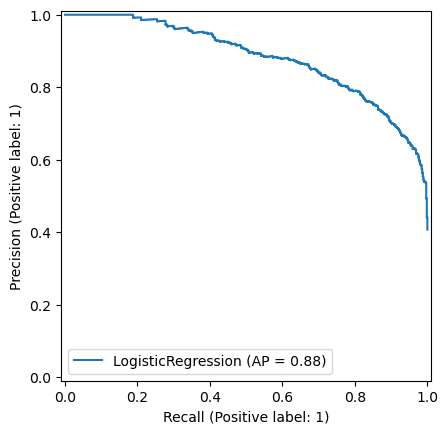

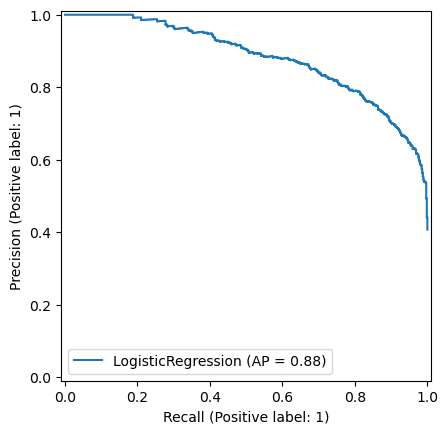

In [202]:
from sklearn.metrics import PrecisionRecallDisplay

# Get predicted probabilities for the positive class (class 1)
y_scores = log_model.predict_proba(X_test)[:, 1]

# Create a PrecisionRecallDisplay object and plot it
display = PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)
display.plot()



#### ROC curve

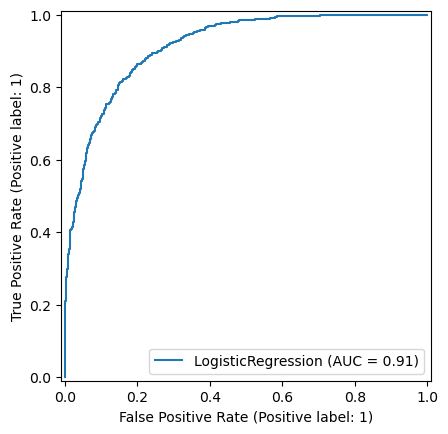

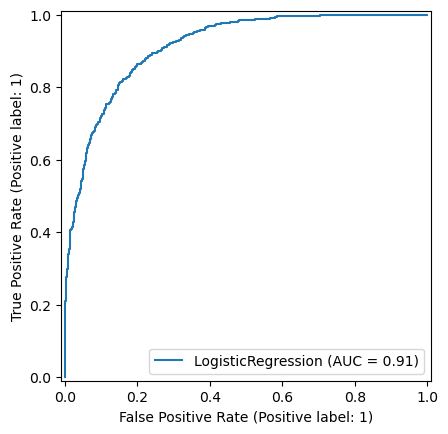

In [205]:
from sklearn.metrics import RocCurveDisplay

# Get predicted probabilities for the positive class (class 1)
y_scores = log_model.predict_proba(X_test)[:, 1]

# Create a ROCAUCDisplay object and plot it
display = RocCurveDisplay.from_estimator(log_model, X_test, y_test)
display.plot()


### KNN Modeling

In [208]:
hms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 7838 non-null   float64
 1   gender_birth                7838 non-null   int64  
 2   exercise_hours_weekly       7838 non-null   float64
 3   seek_help_if_need           7838 non-null   float64
 4   perceived_help_need         7838 non-null   float64
 5   know_where_help             7838 non-null   float64
 6   num_of_support_areas        7838 non-null   int64  
 7   diagnosed_mental_illness    7838 non-null   int64  
 8   therapy_past12_months       7838 non-null   int64  
 9   gpa                         7838 non-null   float64
 10  financial_stress            7838 non-null   float64
 11  year_in_school              7838 non-null   int64  
 12  suicide_idea                7838 non-null   int64  
 13  suicide_plan                7838 

### Scale Numerical columns

#### Keep copies of the split data

In [212]:
numerical_columns = ['student_age', 'gpa', 'year_in_school', 'lonely_score', 
                     'mental_wellness_score', 'anxiety_score', 'eating_disorder_score', 
                     'personal_stigma_score', 'perceived_stigma_score', 'self_stigma_score']


# Min-Max scaling of numerical columns
scaler = MinMaxScaler()
X_train_scaled = X_train_resampled.copy()  # Copy to preserve original data
X_test_scaled = X_test.copy()

# Scale only the numerical columns
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_scaled[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test_scaled[numerical_columns])

### Find the best value for K

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=30)

# Train the KNN model
knn_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

test_error_rates = []
lowest_error= 1
best_k = 1
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train_resampled) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_knn)
    test_error_rates.append(test_error)
    if test_error < 1:
        lowest_error = test_error
        best_k = k

### knn results

In [268]:
lowest_error

0.21811224489795922

In [270]:
best_k

29

In [273]:
accuracy_score(y_test, y_pred_knn)

0.7818877551020408

In [275]:
classification_report(y_test, y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       930\n           1       0.74      0.72      0.73       638\n\n    accuracy                           0.78      1568\n   macro avg       0.77      0.77      0.77      1568\nweighted avg       0.78      0.78      0.78      1568\n'

Text(0.5, 0, 'K Value')

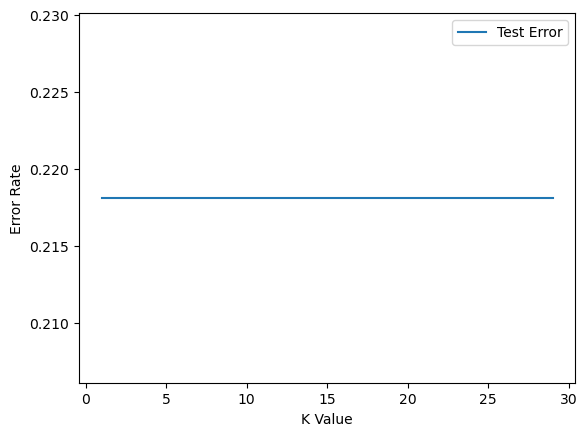

In [260]:

plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

#### Further test K

In [280]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# Create the MinMaxScaler and KNN classifier
scaler = MinMaxScaler()
knn_model = KNeighborsClassifier()

# Set up the pipeline
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', knn_model)
])

# Define the range of k values to test
k_values = list(range(1, 30))

# Create the parameter grid for GridSearchCV
param_grid = {'knn__n_neighbors': k_values}


In [282]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'knn__n_neighbors': 1}
Best cross-validation accuracy:  0.810846602454245


In [283]:
# Make predictions with the best estimator
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Accuracy:  0.7225765306122449
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       930
           1       0.67      0.63      0.65       638

    accuracy                           0.72      1568
   macro avg       0.71      0.71      0.71      1568
weighted avg       0.72      0.72      0.72      1568



### Test With SVM modelling

In [287]:
from sklearn.svm import SVC

#### Setup the model

In [290]:
# SVM Model
svm_model = SVC()

# Set up the pipeline
pipe = Pipeline([
    ('scaler', scaler),
    ('svm', svm_model)
])

# Set up the parameter grid for SVM hyperparameters
param_grid = {
    'svm__C': [0.1, 1, 10],            # Regularization parameter
    'svm__gamma': ['scale', 'auto'],   # Kernel coefficient for RBF
    'svm__kernel': ['linear', 'rbf']   # Types of kernels to test
}


#### Find the best parameters

In [293]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Make predictions with the best estimator
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

Best parameters found:  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation accuracy:  0.8447215473168898


#### Display SVM results

In [295]:
# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy:  0.8169642857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       930
           1       0.76      0.80      0.78       638

    accuracy                           0.82      1568
   macro avg       0.81      0.81      0.81      1568
weighted avg       0.82      0.82      0.82      1568



Logistic Regression appears to have a slight edge over SVM in predicting students at risk, with better performance in both accuracy and F1-score. Although SVM performed well, Logistic Regression seems to be the better choice, and KNN performed the worst